In [8]:
%pip install import-ipynb
%pip install qiskit


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import import_ipynb
import autograder
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.visualization import plot_histogram

importing Jupyter notebook from autograder.ipynb


---
# Lab 1 - Hello Quantum World!
### A Classical Introduction to the World of Quantum Computing
---

> In this hands-on experience, you will harness the power of quantum circuits to encode and decode a simple string. Taking your first steps into the fascinating world of quantum programming.

---
### 1.0 - Getting Started
---
In order to simulate a "Hello World!" application on a quantum computer, you must first determine the number of qubits required to store the string.
Since the basis states of a qubit are |0> and |1>, you will need the same number of qubits as bits to encode the data.
- Note: Basis state are the two measurable states of a [qubit](https://qiskit.org/documentation/stubs/qiskit.circuit.Qubit.html#qubit) 0 or 1 (same as a classical bit)

The first step is to create a function required_qubits. The function will return the number of qubits required to encode the parameter |string|.

In [7]:
def required_qubits(string):
    #TODO determine the number of qubits needed to store string
    return 0

In [8]:
autograder.test_0(required_qubits)

Congrats! You have correctly implemented the required_qubits function!


---
### 1.1 - Time to Create a Quantum Circuit
---
Once you have calculated the number of required qubits, the next step is to create a Quantum Circuit!
> In quantum information theory, a [Quantum Circuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#quantumcircuit) is a model for quantum computation, similar to classical circuits, in which a computation is a sequence of quantum gates, measurements, initializations of qubits to known values, and possibly other actions. 

You can create a Quantum Circuit on a classical computer. After circuit construction, you can classically simulate or run the circuit on a [QPU](https://blogs.nvidia.com/blog/2022/07/29/what-is-a-qpu/) (Quantum Processing Unit).

In [3]:
def create_qc(num_qubits):
    #TODO create a quantum circuit with a QuantumRegister of size num_qubits
    qc = None
    return qc

In [7]:
autograder.test_1(create_qc)

Congrats! You have correctly implemented the create_qc function!


---
### 1.2 - Encoding a String to Binary
---
You have created a Quantum Circuit with enough qubits to encode |string|. Quantum Computers can use binary (basis states). In order to correctly store a string, you must enode your string to binary. Then you can interate through the binary string to encode on a Quantum System.

In [4]:
def string_to_bin(string):
    #TODO convert a string to string of bits, hint use bytearray
    bit_string = ''
    return bit_string

In [6]:
autograder.test_2(string_to_bin)

The return value is not correct.


---
#### A Quantum String
---
 - Demonstrated in the code below:

The default state of a qubit is the basis state |0>. In the below circuit q0 and q1 both have the value 0 (basis state |0>). Together they make the qubit string q1q0 -> 00. 

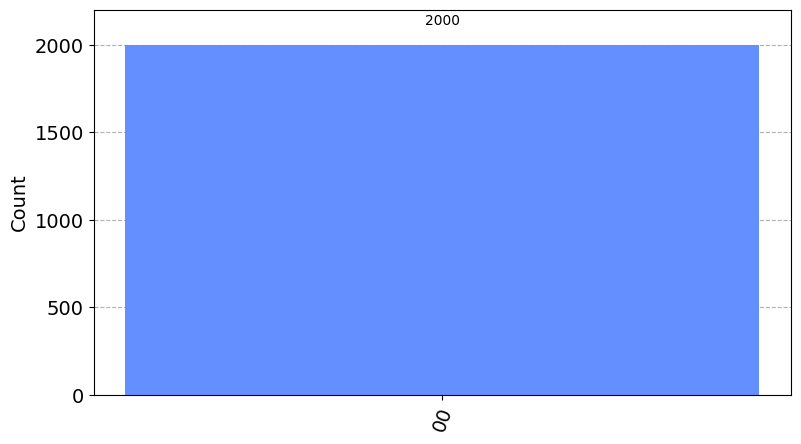

In [6]:
qc = create_qc(2)
qc.measure_all()

sim = Aer.get_backend('aer_simulator')
shots = 2000
count_qpe = execute(qc, sim, shots=shots).result().get_counts()
plot_histogram(count_qpe, figsize=(9,5))

In [7]:
qubit_string = count_qpe.most_frequent()
print("Extracted Qubit String: ",qubit_string)

Extracted Qubit String:  00


A single-qubit Pauli-X gate ([XGate](https://qiskit.org/documentation/stubs/qiskit.circuit.library.XGate.html)), is equivalent to a classical not gate. Applying an XGate to q1 will change the two qubit string's value -> 10.

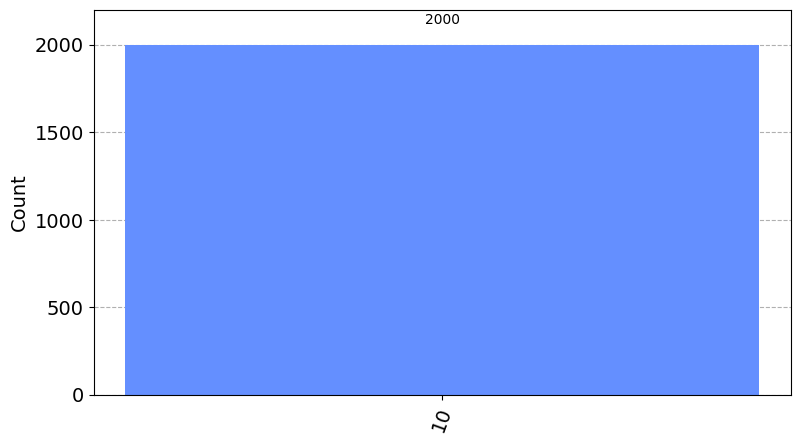

In [8]:
qc1 = create_qc(2)
qc1.x(1)
qc1.measure_all()

sim = Aer.get_backend('aer_simulator')
shots = 2000
count_qpe1 = execute(qc1, sim, shots=shots).result().get_counts()
plot_histogram(count_qpe1, figsize=(9,5))

In [9]:
qubit_string1 = count_qpe1.most_frequent()
print("Extracted Qubit String: ",qubit_string1)

Extracted Qubit String:  10


---
### 1.3 - Encoding and Decoding the String
---
The code segments above demonstrate encoding bit strings into a Quantum Circuit. The next task is to create a function quantum_string. quantum_string will have two parameters (bit_string the string of bits to encode) and (qc the quantum circuit to enode on). It is assumed that qc has enough qubits to store the bit string. Iterate through the bit string and use conditions to apply an XGate at the proper location(s). 

In [5]:
#TODO create ghost functions for lab assignments. Create cells explaining what you are doing.

def quantum_string(bit_string, qc):
    qubit_location = 0 # index variable
    #TODO for each bit in bit_string, change the state of the qubit to match the bit i.e, if bit == 0 |0> else |1> (qubit at index)
    return qc

In [3]:
autograder.test_3(quantum_string)

Congrats! You have correctly implemented the quantum_string function!


Now, qc has qubits encoded to represent a bit string. Write a function decode_string which will extract the string from the circuit qc (parameter).

- Measure all the qubits using the [QuantumCircuit.measure_all()](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html#qiskit.circuit.QuantumCircuit.measure_all) method.
- Simulate the circuit to get the circuit counts. Run the circut on aer_simulator 1000 times(shots). 
- Get the counts from the circuit simulation and store it in a variable. The most_frequent method can be used to extract the value as a bit string.
- Varify the string is in the correct order (can be in reverse order). Return the string in the correct order.
---
**HINT:** once you have extracted a binary string, convert it to a regular string of characters using the provided bin_to_string function.

In [2]:
def bin_to_string(string): 
    return "".join([chr(int(string[i:i+8],2)) for i in range(0,len(string),8)])

In [9]:
def decode_string(qc):
    #TODO measure the qubits and extract the string. HINT: you can find the solution in the cells above
    return bin_to_string("")

In [10]:
autograder.test_4(decode_string)

Congrats! You have correctly implemented the decode_string function!


---
### 1.4 - Hello Quantum World!
---
Now the moment you have been waiting for, Hello Quantum World! Use the function you created above to complete a "Hello World!" program on a Quantum Computer.

In [8]:
msg = "Hello Quantum World!"
#TODO your code goes here
decoded_string = ''
print("Original String: ",msg)
print("Extracted String: ",decoded_string)

Original String:  Hello Quantum World!
Extracted String:  Hello Quantum World!
